In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd

from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
from google.colab import drive

from sklearn.utils import resample
from scipy import stats
 
%matplotlib inline
tf.random.set_seed(42)

In [ ]:
def build_resnet(input_shape, n_feature_maps, nb_classes):
    x = keras.layers.Input(shape=(input_shape))
    conv_x = keras.layers.BatchNormalization()(x)
    conv_x = keras.layers.Conv2D(n_feature_maps, 8, 1, padding='same')(conv_x)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    conv_y = keras.layers.Conv2D(n_feature_maps, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    conv_z = keras.layers.Conv2D(n_feature_maps, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps, 1, 1,padding='same')(x)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x)

    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)

    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)

    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    full = keras.layers.GlobalAveragePooling2D()(y)
    out = keras.layers.Dense(nb_classes, activation='softmax')(full)

    return x, out

In [ ]:
drive.mount('/content/drive/')

!cp "/content/drive/MyDrive/data_to_learn.csv" "/home/"
df = pd.read_csv('/home/data_to_learn.csv')

Mounted at /content/drive/


In [ ]:
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [ ]:
df1 = df.copy()

for feature in df1.columns[:-1]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)

arx range: -21.492 to 9.097647999999998
shape (365740, 7)
ary range: -18.694000000000006 to 11.948059999999998
shape (358441, 7)
arz range: -10.367 to 11.823119999999996
shape (355226, 7)
grx range: -1.0196 to 0.95686
shape (348554, 7)
gry range: -1.1417 to 0.90965
shape (341495, 7)
grz range: -0.69828 to 1.125
shape (335681, 7)


In [ ]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [ ]:
train = df1[ : int(len(df1) * .8079597)]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((271216, 7), (64465, 7))

In [ ]:
X_train = train.drop(['Activity'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity'],axis=1)
y_test = test['Activity']

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((271216, 6), (271216,), (64465, 6), (64465,))

In [ ]:
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])

    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [ ]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)

X_train.shape

(5423, 100, 6)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/modelDL.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]

nb_classes = len(label_map)

x , y = build_resnet(X_train.shape[1:], 64, nb_classes)
model = keras.models.Model(inputs=x, outputs=y)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=128, epochs= 100, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/10
170/170 [==============================] - 51s 89ms/step - loss: 1.0302 - sparse_categorical_accuracy: 0.6445 - val_loss: 11.5679 - val_sparse_categorical_accuracy: 0.1475
Epoch 2/10
170/170 [==============================] - 12s 73ms/step - loss: 0.3601 - sparse_categorical_accuracy: 0.8700 - val_loss: 6.5107 - val_sparse_categorical_accuracy: 0.2725
Epoch 3/10
170/170 [==============================] - 12s 72ms/step - loss: 0.2108 - sparse_categorical_accuracy: 0.9276 - val_loss: 0.5099 - val_sparse_categorical_accuracy: 0.8331
Epoch 4/10
170/170 [==============================] - 12s 71ms/step - loss: 0.1332 - sparse_categorical_accuracy: 0.9585 - val_loss: 3.5924 - val_sparse_categorical_accuracy: 0.5683
Epoch 5/10
170/170 [==============================] - 12s 70ms/step - loss: 0.1883 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.9170 - val_sparse_categorical_accuracy: 0.7492
Epoch 6/10
170/170 [==============================] - 12s 70ms/step - loss: 0.1032 - spar

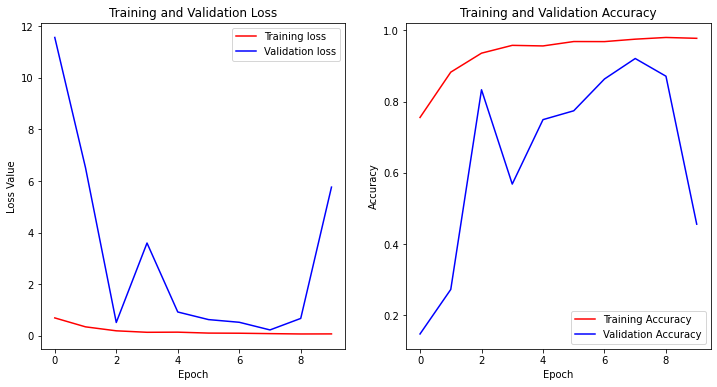

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/modelDL.h5')

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 1s 18ms/step - loss: 0.2207 - sparse_categorical_accuracy: 0.9208
Train accuracy 93.21 %
Train loss 0.17072299122810364
Test accuracy 92.08 %
Test loss 0.22073063254356384


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

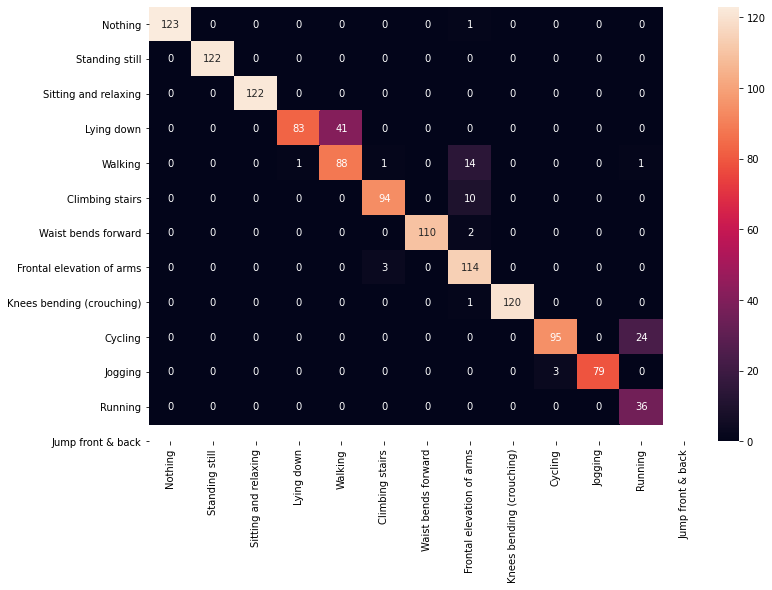

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()